In [1]:
from funzioni import image_to_data,\
    colimage_to_classes,\
    local_entropy,\
    classes_to_colimage,\
    postprocessing_classes,\
    select_layers,\
    image_segmentation,\
    train_on_multi,\
    test_on_multiple_images
import numpy as np
import imageio
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef, plot_confusion_matrix

In [2]:
# Creazione del modello allenandolo su più immagini
svm, score, conf_matrix = train_on_multi(
    ["img/pelle303R.PNG", "img/pelle304R.PNG", "img/pelle601R.PNG"],
    ["img/pelle303R_colors.PNG", "img/pelle304R_colors.PNG", "img/pelle601R_colors.PNG"],
    ["img/pelle301R.PNG", "img/pelle302R.PNG", "img/pelle305R.PNG"],
    ["img/pelle301R_colors.PNG", "img/pelle302R_colors.PNG", "img/pelle305R_colors.PNG"],
    window_size=30,
    window_size_postprocessing=6,
    feature_names=['R_variance', 'G_variance', 'B_variance', 'H_mf', 'E_mf', 'D_mf', 'entropy']
)

print("Score: {}".format(score))

Score: 0.7352582880250621


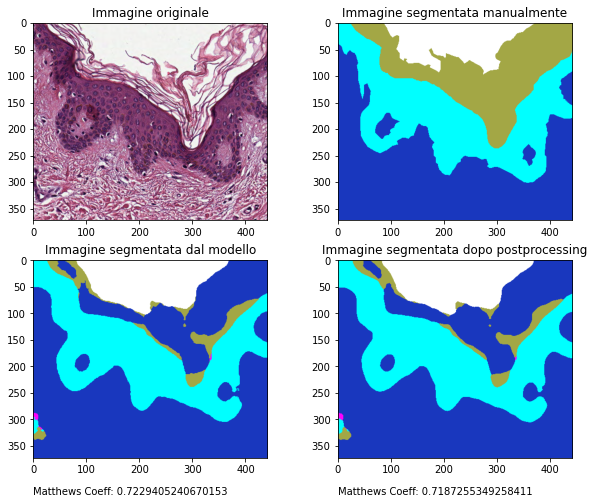

In [14]:
# Generazione dei grafici su una sola immagine di test
image_segmentation(
    svm,
    "img/pelle305R.PNG",
    "img/pelle305R_colors.PNG",
    window_size=30,
    window_size_postprocessing=6,
    feature_names=['R_variance', 'G_variance', 'B_variance', 'H_mf', 'E_mf', 'D_mf', 'entropy']
)

In [18]:
# Riutilizziamo il modello creato prima
# ma calcoliamo il matthews coefficient medio per diverse immagini di test
mc, cm = test_on_multiple_images(svm,
                        ["img/pelle301R.PNG", "img/pelle302R.PNG", "img/pelle305R.PNG"],
                        ["img/pelle301R_colors.PNG", "img/pelle302R_colors.PNG", "img/pelle305R_colors.PNG"],
                        window_size=30,
                        feature_names=['R_variance', 'G_variance', 'B_variance', 'H_mf', 'E_mf', 'D_mf', 'entropy'],
                        window_size_postprocessing=6)

In [19]:
def normalizza_cm(cm):
    
    new_mat = []
    
    for riga in cm:
        new_mat.append([])
        tot_riga = riga.sum()
        for v in riga:
            if v==0:
                new_mat[-1].append(0)
            else:
                new_mat[-1].append(v/tot_riga)
    
    return np.array(new_mat)

<ipython-input-20-84be40fbd35b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation="vertical")
<ipython-input-20-84be40fbd35b>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


[Text(0, -1.0, ''),
 Text(0, 0.0, 'vetrino'),
 Text(0, 1.0, 'strato corneo'),
 Text(0, 2.0, 'epidermide'),
 Text(0, 3.0, 'derma'),
 Text(0, 4.0, 'vasi'),
 Text(0, 5.0, '')]

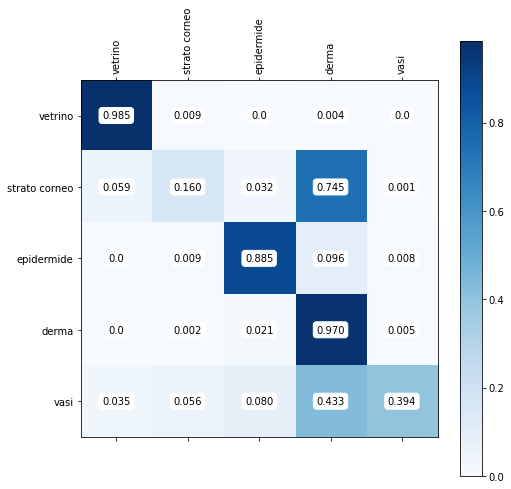

In [20]:
# Mostrare la matrice di confusione

cm_norm = normalizza_cm(cm)
labels = [None, "vetrino","strato corneo","epidermide", "derma","vasi"]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(cm_norm, interpolation='nearest', cmap="Blues")
fig.colorbar(cax)

for (i, j), z in np.ndenumerate(cm_norm):
    ax.text(j, i, '{}'.format(str(z)[:5]), ha='center', va='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor="white"))

ax.set_xticklabels(labels, rotation="vertical")
ax.set_yticklabels(labels)